In [1]:
#required Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2
import os, fnmatch
from pathlib import Path
# import mtcnn
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


# Processing the Videos

In [2]:
#importing file function
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename


In [3]:
file_name = []

In [4]:
for filename in find_files('/Documents/Third_Semester/695/projects/Deepfake', '*.avi'):
    file_name.append(filename)

In [5]:
# reading video fame
# Create a VideoCapture object and read from input file

def extract_multiple_videos(intput_filenames, image_path_infile):
    """Extract video files into sequence of images.
       Intput_filenames is a list for video file names"""

    i = 1  # Counter of first video

    # Iterate file names:
#     cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi')
    cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/DeepfakeTIMIT/higher_quality/mstk0/sa1-video-mrjo0.avi')

    
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

        
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video
            
        if ret:
#           cv2.imwrite(str(i) + '.jpg', frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
            cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)

#           cv2.imshow('frame', frame)  # Display frame for testing
            i += 1 # Advance file counter
        else:
            # Break the interal loop when res status is False.
            break

        cv2.waitKey(100) #Wait 100msec (for debugging)

    cap.release() #Release must be inside the outer loop

In [6]:
# Create a VideoCapture object and read from input file
base_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/'
real_image_path_for_frame = base_path + 'images/real'
fake_image_path_for_frame = base_path + 'images/fake'

# for real uncomment this and run
real_video_name = base_path +'VidTIMIT/mstko/sa1.avi'

#for fake uncomment this and run
fake_video_name = base_path + '/DeepfakeTIMIT/higher_quality/mstk0/sa1-video-mrjo0.avi'


# extract_multiple_videos(real_video_name, real_image_path_for_frame)
extract_multiple_videos(fake_video_name, fake_image_path_for_frame)

# Find difference between these two frames and save it as an image to visually see the difference

In [7]:
# from skimage.measure import structural_similarity as ssim
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2

# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)

In [8]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = measure.compare_ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

In [9]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg")
shopped = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

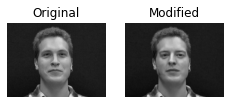

/Users/praladneupane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


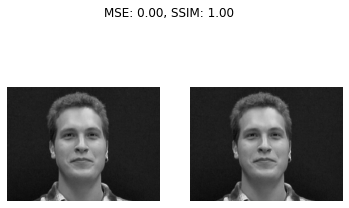

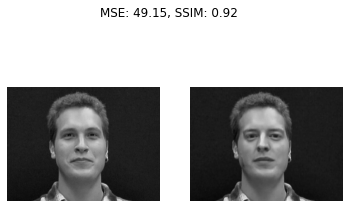

NameError: name 'image3' is not defined

In [10]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Modified", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, shopped, "Original vs. Modified")
# cv2.subtract(original)
# img3 = original-shopped
# image3 = cv2.absdiff(original, shopped)
# image3

is_all_zero = not np.any(image3)

if is_all_zero:
    print('Array contains only 0')
else:
    print('Array has non-zero items too')

# Calculate the Structural Similarity Index (SSIM)

In [11]:
from skimage.measure import compare_ssim
import argparse
import imutils


(score, diff) = compare_ssim(original, shopped, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9150211803207984


/Users/praladneupane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


# Intersting point here

The score represent the structural similarity. So our image is 91.50 % similar.

Diff variable contains the actual bit differences between two images


# Find the contours


https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/

In [12]:
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

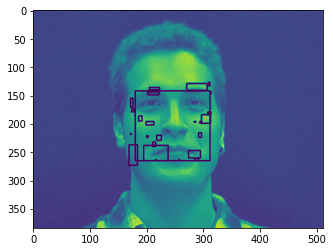

In [13]:
%matplotlib inline

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(shopped, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
# show the output images

# plt.imshow("Original", original)
plt.imshow(original)


# cv2.waitKey(0)

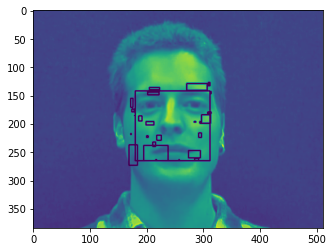

In [14]:
# plt.imshow("Modified", shopped)
plt.imshow(shopped)

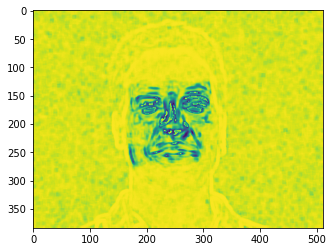

In [15]:
# plt.imshow("Diff", diff)
plt.imshow(diff)

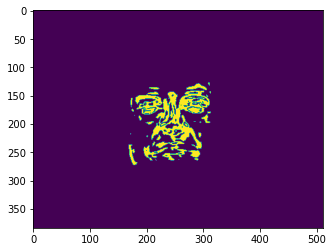

In [16]:
# plt.imshow("Thresh", thresh)
plt.imshow(thresh)

# Creating a histograme to show images differences

Create a historgam for Real Images

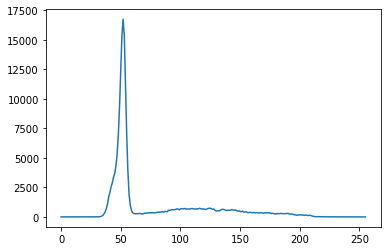

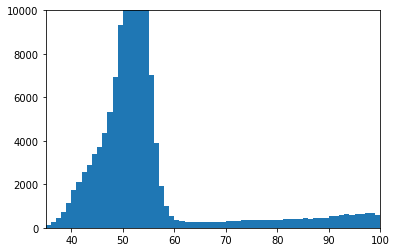

In [17]:
# for the real images
# find frequency of pixels in range 0-255 
img = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg'
imgs = cv2.imread(img, 0)
histrReal = cv2.calcHist([imgs],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histrReal) 
plt.show() 

# alternative way to find histogram of an image 
plt.hist(imgs.ravel(),256,[0,256]) 
plt.axis([35,100,0,10000])
# plt.axis([35,100,15250,17000])
plt.savefig('real_image_histogram.png')
plt.show()


Create a historgam for fake Images

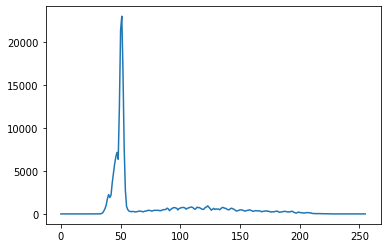

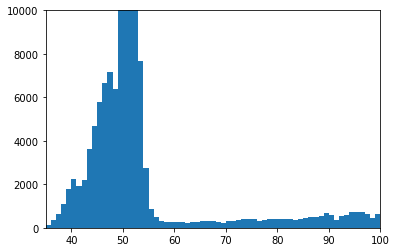

In [18]:
# for the fake images
# find frequency of pixels in range 0-255 
img = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg'
imgs = cv2.imread(img, 0)
histrFake = cv2.calcHist([imgs],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histrFake) 
plt.show() 

# alternative way to find histogram of an image 
plt.hist(imgs.ravel(),256,[0,256]) 
# plt.axis([35,100,15250,17000])
plt.axis([35,100,0,10000])
plt.savefig('fake_image_histogram.png')
plt.show() 

In [19]:
cv2.compareHist(histrFake, histrReal, cv2.HISTCMP_CORREL)

0.8820412367207379

In [20]:
cv2.compareHist(histrFake, histrReal, cv2.HISTCMP_INTERSECT)

162437.0

# Perform face detection

In [21]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

In [22]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list, face_filename):
    # load the image
    data = pyplot.imread(filename)
    for i in range(len(result_list)):
    # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        pyplot.savefig('Dataset/only_face/'+ face_filename)
# show the plot
pyplot.show()

In [23]:
# this is the solution for 1.3
# reading video fame
# Create a VideoCapture object and read from input file

def extract_multiple_videos_faces(intput_video_file_names, image_path_infile):
    """Extract video files into sequence of images.
       Intput_filenames is a list for video file names"""

    i = 1  # Counter of first video

    # Iterate file names:
    cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi')
        
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

        
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video
            
        if ret:
            
#           cv2.imwrite(str(i) + '.jpg', frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
#             this code can be use to do 1.2.3 and 1.3, but i am only doing 1.3 now
#             cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
                
#           cv2.imshow('frame', frame)  # Display frame for testing
    
            filename = os.path.join(image_path_infile , str(i) + '.jpg') 
        
        # this line feels little odd. Cause it looks 
        # like i am reading it mannually but if i uncomment above line it will be dynamic everytime, cause those line 
        # creates the frame in the folder first.
        
            # load image from file
            pixels = pyplot.imread(filename)
            # create the detector, using default weights
            detector = MTCNN()
            # detect faces in the image
            faces = detector.detect_faces(pixels)
            # display faces on the original image
            face_filename_crp = str(i) + '.jpg'
            draw_image_with_boxes(filename, faces, face_filename_crp)
        
    
            i += 1 # Advance file counter
        
            face_filename = str(i) + '.jpg'
            # display faces on the original image
#             draw_image_with_boxes(filename, faces,face_filename)
        else:
            # Break the interal loop when res status is False.
            break

        cv2.waitKey(100) #Wait 100msec (for debugging)

    cap.release() #Release must be inside the outer loop



/Users/praladneupane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


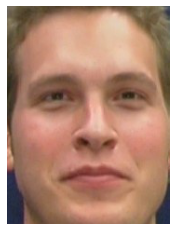

In [24]:
# calling a function

video_file_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi'

base_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/'
real_image_path_for_frame = base_path + 'images/real'
fake_image_path_for_frame = base_path + 'images/fake'

extract_multiple_videos_faces(video_file_path,real_image_path_for_frame)

# if you want to detect face for fake video just change the url

# This is the end of 1.3

In [25]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg")
shopped = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

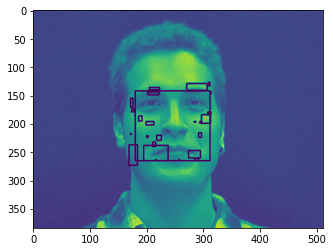

In [26]:
%matplotlib inline

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(shopped, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
# show the output images

# plt.imshow("Original", original)
plt.imshow(original)


# cv2.waitKey(0)

# Creating a blur version of same images

In [27]:
import numpy
# Python Program to blur image 
  
# Importing cv2 module 
import cv2  

original = "/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg"
src = cv2.imread(original, cv2.IMREAD_UNCHANGED)
 
# apply guassian blur on src image
blured = cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)



# SSIM betyween real and Blur

In [28]:
from skimage.measure import compare_ssim
import argparse
import imutils


original = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg")
# shopped = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
blured = cv2.cvtColor(blured, cv2.COLOR_BGR2GRAY)

(score, diff) = compare_ssim(original, blured, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9505232828356589


/Users/praladneupane/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


# calculate MSE from original and bluer

In [29]:
def MSE(img1, img2):
        squared_diff = (img1 -img2) ** 2
        summed = np.sum(squared_diff)
        num_pix = img1.shape[0] * img1.shape[1] #img1 and 2 should have same shape
        err = summed / num_pix
        return err

In [30]:
MSE(original, blured)

6.904693603515625

# Calculate PSNR between original and blur

In [31]:
import math

In [32]:
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [33]:
d=psnr(original,blured)
print(d)

39.739359493877004


# Calculate feature verctor

In [68]:
# img1 = cv2.imread(cv2.samples.findFile(original), cv2.IMREAD_GRAYSCALE)
# img2 = cv2.imread(cv2.samples.findFile(blured), cv2.IMREAD_GRAYSCALE)
import cv2 as cv

img1 = original
img2 = blured
if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv2.xfeatures2d.SURF_create(hessianThreshold=minHessian)

keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a brute force matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_BRUTEFORCE)
matches = matcher.match(descriptors1, descriptors2)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv.drawMatches(img1, keypoints1, img2, keypoints2, matches, img_matches)
#-- Show detected matches
cv.imshow('Matches', img_matches)
cv.waitKey()

# Using SIFT

In [85]:
def calculate_feature_vector(img1, img2):
    if img1 is None or img2 is None:
        print('Could not open or find the images!')
        exit(0)
    #-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
    minHessian = 400
    detector = cv2.SIFT_create()
    
    keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
    #-- Step 2: Matching descriptor vectors with a brute force matcher
    # Since SURF is a floating-point descriptor NORM_L2 is used
    matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_BRUTEFORCE)
    matches = matcher.match(descriptors1, descriptors2)
    #-- Draw matches
    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
    cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, img_matches)
    #-- Show detected matches
    plt.imshow(img_matches)
    cv2.waitKey()

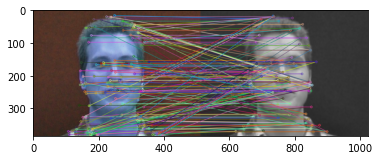

In [86]:
original = cv2.imread("/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg")
blurred = cv2.GaussianBlur(original,(5,5),cv2.BORDER_DEFAULT)


calculate_feature_vector(original, blured)

In [35]:
cv2.__version__

'4.4.0'

# Extracting feature 2.2

Just Gray Image

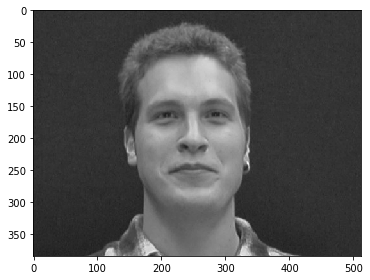

In [36]:
from skimage.io import imread, imshow

original = "/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg"
image = imread(original, as_gray=True)
imshow(image)

In [37]:
image.shape, image

((384, 512),
 array([[0.21279255, 0.19710627, 0.20887098, ..., 0.21754745, 0.21279255,
         0.20494941],
        [0.20887098, 0.19710627, 0.21279255, ..., 0.21362588, 0.20887098,
         0.20102784],
        [0.19710627, 0.19318471, 0.20970431, ..., 0.21138588, 0.20578275,
         0.20186118],
        ...,
        [0.14829059, 0.15613373, 0.16789843, ..., 0.1841502 , 0.18975333,
         0.1936749 ],
        [0.15164667, 0.15613373, 0.16397686, ..., 0.1841502 , 0.18583176,
         0.18975333],
        [0.15556824, 0.15613373, 0.15613373, ..., 0.18022863, 0.18217804,
         0.1866651 ]]))

# Method #1: Grayscale Pixel Values as Features

((384, 512), <matplotlib.image.AxesImage at 0x153262898>)

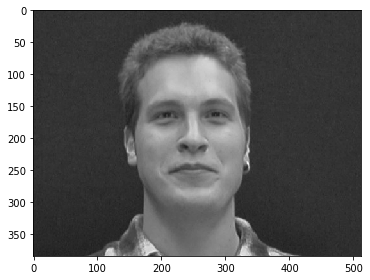

In [38]:
image.shape, imshow(image)

The image shape here is 400 x 512. Hence, the number of features should be 196608

In [39]:
#pixel features #you can calculate the feature by chenging the dimention but dimention multiply size must be same

features = np.reshape(image, (384*512))

features.shape, features

((196608,),
 array([0.21279255, 0.19710627, 0.20887098, ..., 0.18022863, 0.18217804,
        0.1866651 ]))

# Method #2: Mean Pixel Value of Channels

(384, 512, 3)

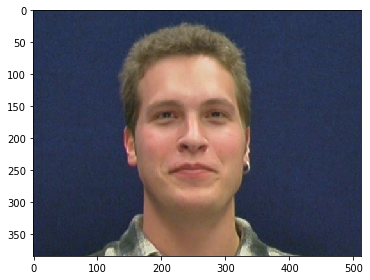

In [40]:
# no more gray image only
image = imread(original)
imshow(image)
image.shape

In [41]:
feature_matrix = np.zeros((384,512)) 
feature_matrix.shape

(384, 512)

# getting average pixel value

In [42]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

In [43]:
features = np.reshape(feature_matrix, (384*512)) 
features.shape

(196608,)

# Method #3: Extracting Edge Features

You must have recognized the objects in an instant – a dog, a car and a cat. What are the features that you considered while differentiating each of these images? The shape could be one important factor, followed by color, or size. What if the machine could also identify the shape as we do?


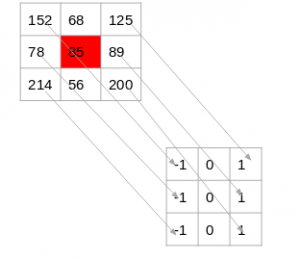
Source: Applied Machine Learning Course

To identify if a pixel is an edge or not, we will simply subtract the values on either side of the pixel. For this example, we have the highlighted value of 85. We will find the difference between the values 89 and 78. Since this difference is not very large, we can say that there is no edge around this pixel.

Now consider the pixel 125 highlighted in the below image:

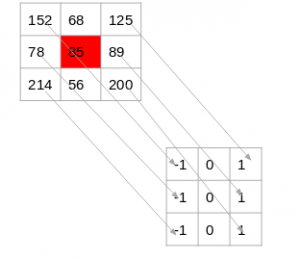
Source: Applied Machine Learning Course

Since the difference between the values on either side of this pixel is large, we can conclude that there is a significant transition at this pixel and hence it is an edge


No! There are various kernels that can be used to highlight the edges in an image. The method we just discussed can also be achieved using the Prewitt kernel (in the x-direction). Given below is the Prewitt kernel:


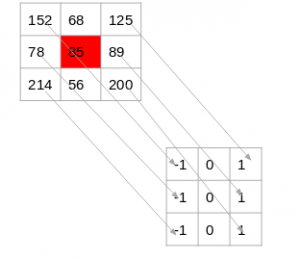
prewitt kernel

We take the values surrounding the selected pixel and multiply it with the selected kernel (Prewitt kernel). We can then add the resulting values to get a final value. Since we already have -1 in one column and 1 in the other column, adding the values is equivalent to taking the difference.

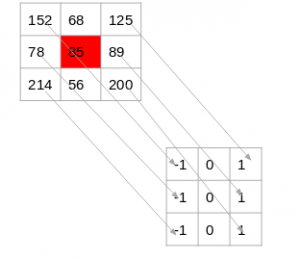

There are various other kernels and I have mentioned four most popularly used ones below:

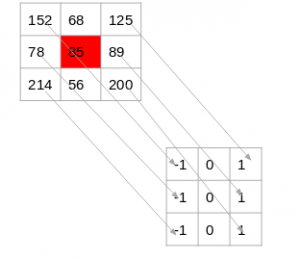


Reference: https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

#  Generate edge features

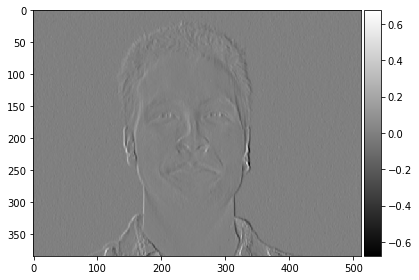

In [44]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v

%matplotlib inline

#reading the image 
image = imread(original,as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

# Implementing HOG Feature Descriptor

(384, 512, 3)


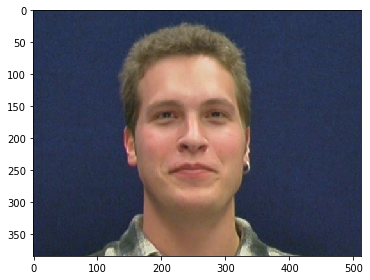

In [45]:

#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread(original)
imshow(img)
print(img.shape)

(128, 80, 3)


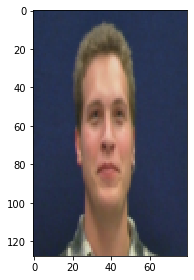

In [46]:
#resizing image 
resized_img = resize(img, (128,80)) 
imshow(resized_img) 
print(resized_img.shape)

In [47]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

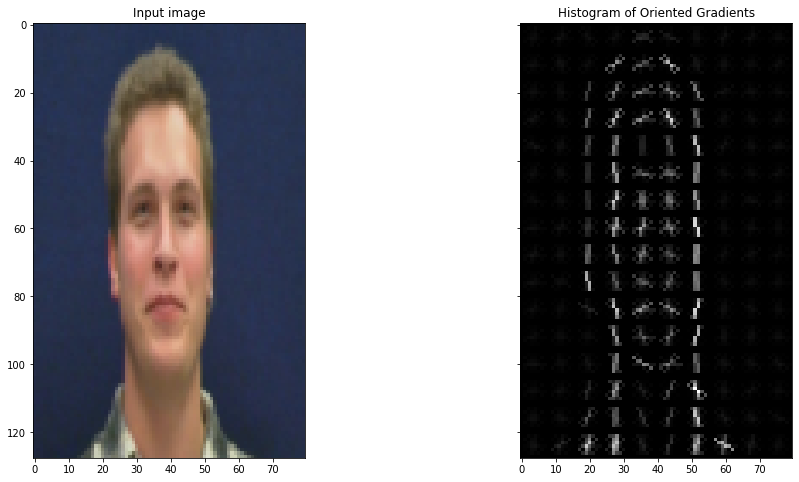

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# Storing With HDF5#

h5py.h5t.STD_U8BE specifies the type of data that will be stored in the dataset, which in this case is unsigned 8-bit integers. 

# Preparing the Dataset#

Unpickles each of the five batch files and loads all of the images into a NumPy array

In [49]:
import numpy as np
import pickle
from pathlib import Path

# Path to the unzipped CIFAR data
data_dir = Path("data/cifar-10-batches-py/")

# Unpickle function provided by the CIFAR hosts
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


images, labels = [], []
for batch in data_dir.glob("data_batch_*"):
    batch_data = unpickle(batch)
    for i, flat_im in enumerate(batch_data[b"data"]):
        im_channels = []
        # Each image is flattened, with channels in order of R, G, B
        for j in range(3):
            im_channels.append(
                flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32))
            )
        # Reconstruct the original image
        images.append(np.dstack((im_channels)))
        # Save the label
        labels.append(batch_data[b"labels"][i])

print("Loaded CIFAR-10 training set:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")


Loaded CIFAR-10 training set:
 - np.shape(images)     (50000, 32, 32, 3)
 - np.shape(labels)     (50000,)


# Storing a Single Image using HDF5, This is just an example

In [53]:
from pathlib import Path

disk_dir = Path("data/disk/")
lmdb_dir = Path("data/lmdb/")
hdf5_dir = Path("data/hdf5/")

In [54]:
disk_dir.mkdir(parents=True, exist_ok=True)
lmdb_dir.mkdir(parents=True, exist_ok=True)
hdf5_dir.mkdir(parents=True, exist_ok=True)

In [55]:
import h5py

def store_single_hdf5(image, image_id, label):
    """ Stores a single image to an HDF5 file.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    # Create a new HDF5 file
    file = h5py.File(hdf5_dir / f"{image_id}.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "image", np.shape(image), h5py.h5t.STD_U8BE, data=image
    )
    meta_set = file.create_dataset(
        "meta", np.shape(label), h5py.h5t.STD_U8BE, data=label
    )
    file.close()


In [57]:
# storing on disk

from PIL import Image
import csv

def store_single_disk(image, image_id, label):
    """ Stores a single image as a .png file on disk.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")

    with open(disk_dir / f"{image_id}.csv", "wt") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        writer.writerow([label])


In [58]:
_store_single_funcs = dict(
    disk=store_single_disk,hdf5=store_single_hdf5
)



In [59]:
from timeit import timeit

store_single_timings = dict()

for method in ("disk", "hdf5"):
    t = timeit(
        "_store_single_funcs[method](image, 0, label)",
        setup="image=images[0]; label=labels[0]",
        number=1,
        globals=globals(),
    )
    store_single_timings[method] = t
    print(f"Method: {method}, Time usage: {t}")


Method: disk, Time usage: 0.013161967000087316
Method: hdf5, Time usage: 0.04303102000017134


# Implementation

In [60]:
import datetime as dt
import h5py
from glob import glob
import matplotlib.pylab as plb

In [61]:
# this is actual image copmpression to hdf5 which is not what we want

def proc_images():
    """
    Saves compressed, resized images as HDF5 datsets
    Returns
        data.h5, where each dataset is an image or class label
        e.g. X23,y23 = image and corresponding class label
    """
    start = dt.datetime.now()
    # ../input/
    PATH = os.path.abspath(os.path.join('..', 'Deepfake/Dataset/'))
    # ../input/sample/images/
    SOURCE_IMAGES = os.path.join(PATH, "images", "real")
    # ../input/sample/images/*.png
    
    print(SOURCE_IMAGES)
    images = glob(os.path.join(SOURCE_IMAGES, "*.jpg"))


       
    # Set the disease type you want to look for
    disease="Infiltration"
    

    
    # Size of data
    NUM_IMAGES = len(images)
    HEIGHT = 128
    WIDTH = 80
    CHANNELS = 3
    SHAPE = (HEIGHT, WIDTH, CHANNELS)
    
    with h5py.File('data.h5', 'w') as hf: 
        for i,img in enumerate(images):            
            # Images
            
            #definig files
            file = h5py.File(hdf5_dir / f"{img}.h5", "w")
            
            image = cv2.imread(img)
            image = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
            Xset = hf.create_dataset(
                name='X'+str(i),
                data=image,
                shape= (HEIGHT, WIDTH, CHANNELS),
                maxshape=(HEIGHT, WIDTH, CHANNELS),
                compression="gzip",
                compression_opts=9)
            
             # Create a dataset in the file
            dataset = file.create_dataset(
                "image", np.shape(image), h5py.h5t.STD_U8BE, data=image
                )
             # Labels
            base = os.path.basename(img)
            finding = []
            yset = hf.create_dataset(
                name='y'+str(i),
                shape= (1,),
                maxshape=(None,),
                compression="gzip",
                compression_opts=9)
            if disease in finding:
                finding = 1
                yset = finding
            else:
                finding = 0
                yset = finding
            end=dt.datetime.now()
            print("\r", i, ": ", (end-start).seconds, "seconds", end="")

In [62]:
# h5 file created in the folder
proc_images()

/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real
 92 :  0 seconds

In [63]:
!ls -lha

total 19264
drwxr-xr-x  12 praladneupane  staff   384B Sep 25 23:25 .
drwxr-xr-x   8 praladneupane  staff   256B Sep  8 22:59 ..
-rw-r--r--@  1 praladneupane  staff   6.0K Sep 21 14:44 .DS_Store
drwxr-xr-x   5 praladneupane  staff   160B Sep 23 21:46 .ipynb_checkpoints
-rw-r--r--   1 praladneupane  staff   178K Sep 25 23:02 Data_representation_fpor_nural_network.ipynb
drwxr-xr-x   7 praladneupane  staff   224B Sep 14 13:36 Dataset
drwxr-xr-x   7 praladneupane  staff   224B Sep 21 09:56 data
-rw-r--r--   1 praladneupane  staff   2.5M Sep 25 23:25 data.h5
-rw-r--r--   1 praladneupane  staff   6.4K Sep 25 23:05 fake_image_histogram.png
-rw-r--r--@  1 praladneupane  staff   6.1M Sep 25 23:25 processing_the_videos.ipynb
-rw-r--r--@  1 praladneupane  staff   6.4K Sep 25 23:05 real_image_histogram.png
-rw-r--r--   1 praladneupane  staff    61K Sep 17 07:59 test.ipynb


[<HDF5 dataset "X5": shape (128, 80, 3), type "|u1">]


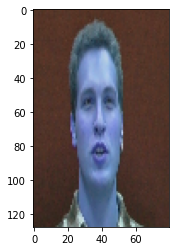

In [64]:
with h5py.File('data.h5', 'r') as hf:
    plb.imshow(hf["X5"])
    print([(hf["X5"])])

# Reading images

In [224]:
filename = "Dataset/images/real/1.jpg.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f['image'])
    print(data)

Keys: <KeysViewHDF5 ['image']>
[array([[86, 53, 36],
       [85, 54, 39],
       [82, 53, 38],
       [80, 54, 38],
       [83, 54, 40],
       [85, 53, 40],
       [88, 54, 41],
       [91, 54, 42],
       [85, 52, 39],
       [87, 54, 39],
       [92, 57, 43],
       [87, 53, 37],
       [91, 57, 40],
       [88, 55, 40],
       [85, 53, 40],
       [84, 54, 43],
       [78, 50, 39],
       [83, 57, 46],
       [76, 50, 36],
       [75, 53, 38],
       [77, 51, 37],
       [77, 51, 37],
       [85, 52, 39],
       [85, 51, 38],
       [87, 54, 34],
       [91, 59, 40],
       [90, 57, 41],
       [86, 55, 40],
       [88, 56, 43],
       [90, 56, 43],
       [89, 54, 41],
       [90, 54, 40],
       [85, 52, 39],
       [92, 58, 45],
       [88, 50, 38],
       [95, 55, 43],
       [90, 51, 39],
       [90, 54, 42],
       [85, 53, 40],
       [82, 54, 40],
       [85, 57, 46],
       [83, 52, 43],
       [84, 52, 46],
       [86, 52, 46],
       [88, 52, 45],
       [87, 51, 42],
  

In [227]:
filename = "Dataset/images/real/2.jpg.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f['image'])
    print(data)

Keys: <KeysViewHDF5 ['image']>
[array([[87, 52, 38],
       [90, 55, 41],
       [89, 54, 39],
       [84, 50, 37],
       [86, 54, 41],
       [81, 52, 38],
       [83, 53, 42],
       [80, 53, 42],
       [83, 51, 40],
       [81, 50, 39],
       [92, 57, 47],
       [88, 52, 42],
       [87, 52, 42],
       [88, 56, 43],
       [87, 58, 44],
       [80, 55, 39],
       [75, 51, 36],
       [79, 56, 41],
       [80, 54, 40],
       [80, 53, 39],
       [83, 51, 38],
       [85, 50, 37],
       [90, 55, 42],
       [89, 54, 41],
       [88, 53, 40],
       [91, 56, 43],
       [90, 57, 41],
       [87, 54, 39],
       [87, 56, 41],
       [88, 56, 43],
       [81, 51, 40],
       [81, 51, 40],
       [82, 50, 39],
       [86, 56, 45],
       [83, 51, 42],
       [80, 51, 44],
       [82, 53, 46],
       [80, 51, 42],
       [81, 54, 42],
       [82, 52, 41],
       [84, 52, 41],
       [84, 52, 41],
       [85, 53, 40],
       [87, 54, 42],
       [84, 55, 41],
       [85, 56, 42],
  

# Feature extraction

# Image features
For this task, first of all, we need to understand what is an Image Feature and how we can use it.
Image feature is a simple image pattern, based on which we can describe what we see on the image. For example cat eye will be a feature on a image of a cat. The main role of features in computer vision(and not only) is to transform visual information into the vector space. This give us possibility to perform mathematical operations on them, for example finding similar vector(which lead us to similar image or object on the image)

# Ok, but how to get this features from the image?
There are two ways of getting features from image, first is an image descriptors(white box algorithms), second is a neural nets(black box algorithms). Today we will be working with the first one.



-- source:https://medium.com/machine-learning-world/feature-extraction-and-similar-image-search-with-opencv-for-newbies-3c59796bf774

In [131]:
import cv2
import numpy as np
import scipy
# from scipy.imageio.imread import imread
from skimage.io import imread, imshow
from PIL import Image
# import cPickle as pickle
import pickle as cPickle
import random
import os
import io
import matplotlib.pyplot as plt
import imageio

In [135]:
# Feature extractor
def extract_features(image_path, vector_size=32):
#     image = io.imread(filename,plugin='matplotlib')
#     image = imread(image_path, pilmode="RGB")  # original
    image = imread(image_path,plugin='matplotlib')
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.SIFT_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc


In [189]:
# for saving in pkt format, Not a
def batch_extractor(images_path, pickled_db_path="features.pck"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print('Extracting features from image %s' % f)
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'wb') as fp:
        pickle.dump(result, fp)

In [268]:
# actual solution to the project
def batch_extractor_h5(images_path, pickled_db_path="mytestfile.h5"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print('Extracting features from image %s' % f)
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'wb') as fp:
        p = h5py.File("mytestfile.h5", "w")
        grp = p.create_group("file_info")
        grp.attrs['results'] = list(result)
        grp.attrs['lebels'] = list(fp)

        

In [269]:
# real_image_path_for_frame = base_path + 'images/real'
# fake_image_path_for_frame = base_path + 'images/fake'
original = "/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/"

import glob
imagePaths = [f for f in glob.glob(original)]  # or .png, .tif, etc
# print(imagePaths)
for image_path in imagePaths:
    batch_extractor_h5(image_path)

Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/1.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/10.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/11.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/12.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/13.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/14.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/15.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/

Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/72.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/73.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/74.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/75.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/76.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/77.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/78.jpg
Extracting features from image /Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake

UnsupportedOperation: read